## CEOs Twitter Presence

In [19]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import numpy as np
import warnings
from textblob import TextBlob
from plotly.subplots import make_subplots
import seaborn as sns
warnings.filterwarnings('ignore')

### Preparing Dataframe with all CEOs in analysis:

In [20]:
def sentiment_analysis(ds):
        sentiment = TextBlob(ds['Tweets']).sentiment
        return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [32]:
def ceo_df(name):
    ceo_raw = pd.read_csv("../data/raw/"+name+".csv")
    
    ceo_raw["created_at"] = pd.to_datetime(ceo_raw["created_at"]).dt.date
    ceo_raw["created_at"] = pd.to_datetime(ceo_raw["created_at"])
    ceo_raw['full_text'] = ceo_raw['full_text'].astype(str)

    # Aggregating Tweets by date:
    ceo_cleaned = (    
        ceo_raw.groupby(["created_at"])
        .agg(
            Tweets=("full_text", "sum"),
            Agg_count=("full_text", "count"),
            Agg_retweet=("retweet_count", "sum"),
            Agg_favorite=("favorite_count", "sum")
        )
        .reset_index())
    ceo_cleaned['ceo'] = name
    ceo_raw['ceo'] = name
    ceo_cleaned['Tweets'] = ceo_cleaned['Tweets'].astype(str)
    
    
    # Aggregating Tweets by CEO name:
    ceo_pol = (    
        ceo_cleaned.groupby(["ceo"])
        .agg(
            Tweets=("Tweets", "sum"),
            Agg_count=("Agg_count", "count"),
            Agg_retweet=("Agg_retweet", "sum"),
            Agg_favorite=("Agg_favorite", "sum")
        )
        .reset_index())
    
    # Adding Subjectivity & Polarity
    ceo_pol[["subjectivity", "polarity"]] = ceo_pol.apply(sentiment_analysis, axis=1)
    
    return ceo_raw, ceo_pol

In [74]:
# CEOs csv files names:
ceo_names = ['sundar','albert','benioff','branson','dorsey','drewhouston','elonmusk','JeffBezos','timcook','switter']

sundar_raw, sundar_pol = ceo_df('sundar')
albert_raw,albert_pol = ceo_df('albert')
benioff_raw, benioff_pol  = ceo_df('benioff')
branson_raw, branson_pol = ceo_df('branson')
dorsey_raw, dorsey_pol = ceo_df('dorsey')
drewhouston_raw, drewhouston_pol = ceo_df('drewhouston')
elonmusk_raw, elonmusk_pol = ceo_df('elonmusk')
JeffBezos_raw, JeffBezos_pol = ceo_df('JeffBezos')
timcook_raw, timcook_pol = ceo_df('timcook')
switter_raw, switter_pol = ceo_df('switter')

In [79]:
# Merging DFs:
ceos_raw = [sundar_raw,albert_raw,benioff_raw,branson_raw,dorsey_raw,drewhouston_raw,elonmusk_raw,JeffBezos_raw,timcook_raw]
ceos_pol = [sundar_pol,albert_pol,benioff_pol,branson_pol,dorsey_pol,drewhouston_pol,elonmusk_pol,JeffBezos_pol,timcook_pol]

dfs_ceos_raw = pd.concat(ceos_raw, ignore_index=True)
dfs_ceos_polarity = pd.concat(ceos_pol, ignore_index=True)

In [82]:
# Fixing CEOs Names:
ceo_names_rev = ['Sundar Pachai','Albert Bourla','Marc Benioff','Richard Branson','Jack Dorsey','Drew Houston','Elon Musk','Jeff Bezos','Tim Cook','Switter']

for old_n, new_n in zip(ceo_names, ceo_names_rev):
    dfs_ceos_raw = dfs_ceos_raw.replace(old_n,new_n)
    dfs_ceos_polarity = dfs_ceos_polarity.replace(old_n,new_n)
    
dfs_ceos_raw = dfs_ceos_raw.sort_values(by='ceo',ascending=True)    
dfs_ceos_polarity = dfs_ceos_polarity.sort_values(by='ceo',ascending=True)    

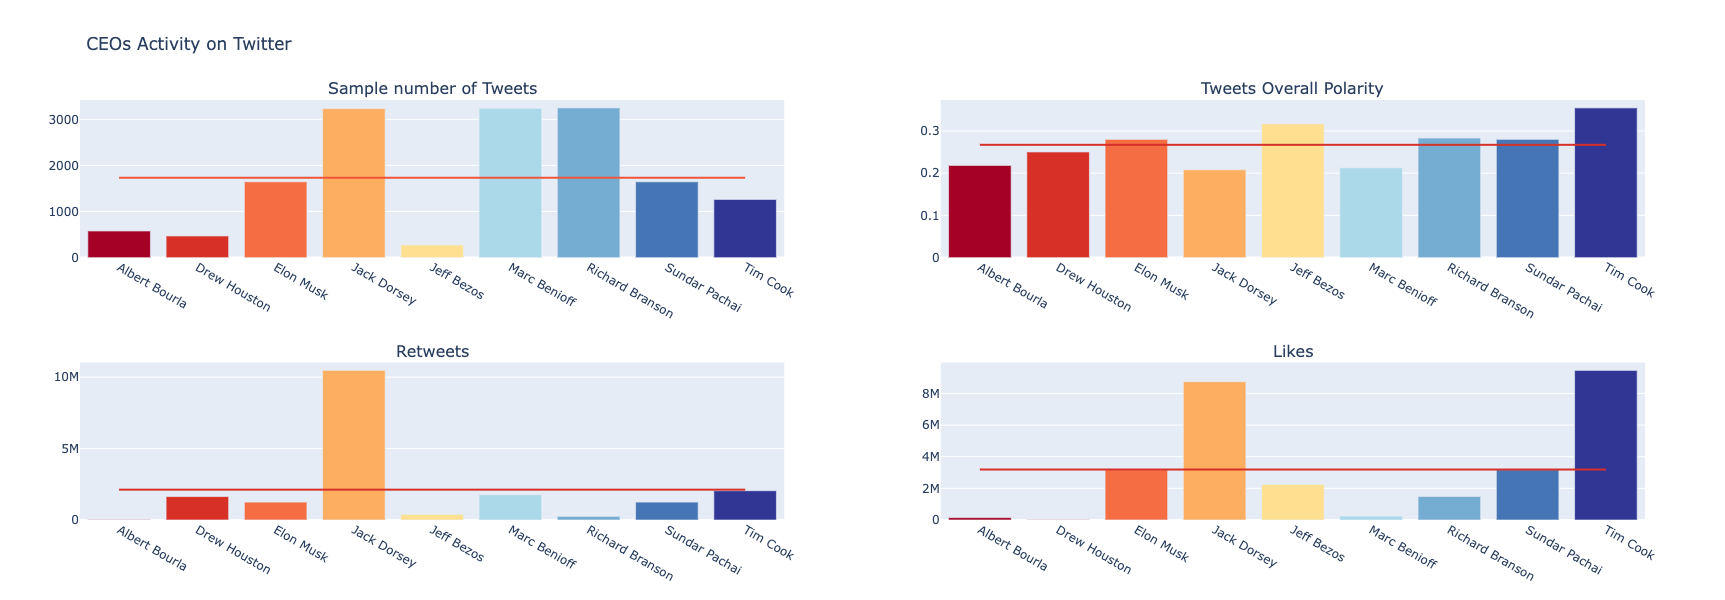

In [83]:
dfs_ceos_raw_plot = dfs_ceos_raw.groupby('ceo').count().reset_index()

#Calculating Means:
dfs_ceos_raw_plot['Avg_Tweets'] = dfs_ceos_raw_plot['full_text'].mean()
dfs_ceos_polarity['Avg_Pol'] = dfs_ceos_polarity['polarity'].mean()
dfs_ceos_polarity['Avg_Likes'] = dfs_ceos_polarity['Agg_favorite'].mean()
dfs_ceos_polarity['Avg_Retweets'] = dfs_ceos_polarity['Agg_retweet'].mean()
colors = {'color':["#a50026","#d73027","#f46d43","#fdae61","#fee090","#abd9e9","#74add1","#4575b4","#313695","#1a1e74"]}
  

# Plotting:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Sample number of Tweets", "Tweets Overall Polarity", "Retweets","Likes"))
fig.add_trace(go.Bar(x=dfs_ceos_raw_plot['ceo'], y=dfs_ceos_raw_plot['full_text'],marker=colors), row=1, col=1)
fig.add_trace(go.Scatter(x=dfs_ceos_raw_plot['ceo'], y=dfs_ceos_raw_plot['Avg_Tweets'],mode='lines',marker=dict(color=["#d73027"])), row=1, col=1)

fig.add_trace(go.Bar(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['polarity'],marker=colors), row=1, col=2)
fig.add_trace(go.Scatter(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['Avg_Pol'],mode='lines',marker=dict(color="#d73027")), row=1, col=2)

fig.add_trace(go.Bar(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['Agg_retweet'],marker=colors), row=2, col=1)
fig.add_trace(go.Scatter(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['Avg_Retweets'],mode='lines',marker=dict(color="#d73027")), row=2, col=1)

fig.add_trace(go.Bar(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['Agg_favorite'],marker=colors), row=2, col=2)
fig.add_trace(go.Scatter(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['Avg_Likes'],mode='lines',marker=dict(color="#d73027")), row=2, col=2)
    
fig.update_layout(height=600, width=800,title_text="CEOs Activity on Twitter", showlegend=False)
fig.show()
